# **House sale prices**

## Objectives

* Train a machine learning model to predict house prices.
* Use the prepared and transformed data created in previous steps (DataCollection, DataCleaning, and FeatureEngineering).
* Optimize hyperparameters to improve the model’s performance.

## Inputs

* Dataset with house prices that has gone through **data preparation** and **feature engineering** (`HousePricesCleaned.csv`, `HousePricesFeatures.csv`).
* Libraries for machine learning and data handling, including:
  - `pandas` for data manipulation.
  - `sklearn` for machine learning and model training.
  - `matplotlib` and `seaborn` for visualizations.

## Outputs

* Trained machine learning model.
* Predictions made on test data and an evaluation of how well the model performed.
* Visuals showing the model's predictions and errors.
* Saved predictions or the trained model for future use.

___

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

___

Imports

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [14]:
# Load the dataset
df = pd.read_csv("outputs/datasets/collection/HousePricesFeatures.csv")
print(df.head())
print(df.info())

# Check non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

   2ndFlrSF  BedroomAbvGr  BsmtFinSF1  GarageArea  GrLivArea  BsmtExposure_Av  \
0  1.213595      0.153895    0.575425    0.351000   0.370333                0   
1 -0.756746      0.153895    1.171992   -0.060731  -0.482512                0   
2  1.241281      0.153895    0.092907    0.631726   0.515013                0   
3 -0.756746      0.153895   -0.499274    0.790804   0.383659                0   
4 -0.756746      1.416182    0.463568    1.698485   1.299326                1   

   BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  BsmtFinType1_ALQ  ...  \
0                0                0                1                 0  ...   
1                1                0                0                 1  ...   
2                0                1                0                 0  ...   
3                0                0                1                 1  ...   
4                0                0                0                 0  ...   

   BsmtFinType1_Rec  BsmtFinType1_Unf 

Define features and target variable

In [15]:
# Define features (X) and target (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

Split Data into Training and Testing Sets

In [16]:
# Log-transform the target variable
y_log = np.log1p(y)

# Train-test split with the log-transformed target variable
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

Create a machine learning pipeline

In [17]:
# Create a machine learning pipeline with Gradient Boosting
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('model', GradientBoostingRegressor(random_state=42))  # Model to train
])

# Train the pipeline with initial hyperparameters
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor(random_state=42))])

Make predictions and evaluate model

In [20]:
# Make predictions and evaluate model on log-transformed target
y_pred_log = pipeline.predict(X_test)

# Inverse log-transform predictions and target to evaluate in original scale
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
print(f"Mean Squared Error (Gradient Boosting, Log-transformed): {mse}")
print(f"R² Score (Gradient Boosting, Log-transformed): {r2}")


Mean Squared Error (Gradient Boosting, Log-transformed): 1039134722.6353544
R² Score (Gradient Boosting, Log-transformed): 0.851086162176262


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameters for randomized search
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Randomized search for hyperparameters
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found and evaluate the model
print(f"Best hyperparameters from random search: {random_search.best_params_}")
y_pred_optimized = random_search.best_estimator_.predict(X_test)

# Display only the first 10 predictions
print(f"First 10 Optimized Predictions: {y_pred_optimized[:10]}")

# Evaluate and print results
print(f"Optimized MSE: {mean_squared_error(y_test, y_pred_optimized)}")
print(f"Optimized R² Score: {r2_score(y_test, y_pred_optimized)}")




Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   6.2s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   6.0s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   6.6s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   6.6s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   6.5s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time=   7.2s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=200; total time=   7.5s
[CV] END model__max_depth=None, model__min_samples_leaf=2, model__min_samples_split

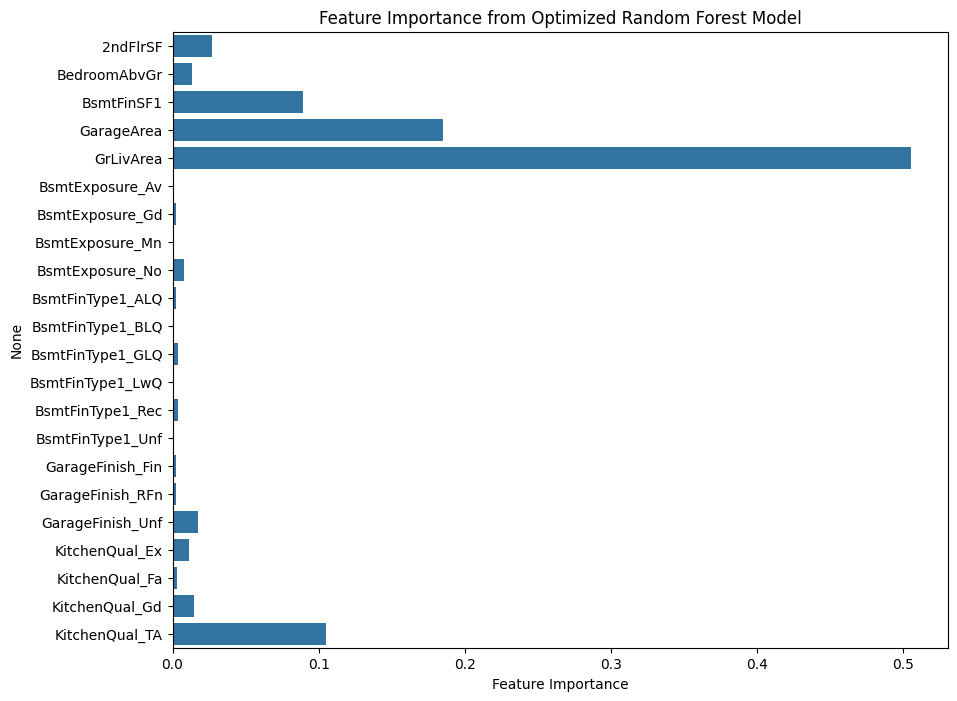

In [22]:
# Calculate and print feature importance for the optimized model
best_model = random_search.best_estimator_.named_steps['model']
feature_importances = best_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Optimized Random Forest Model')
plt.show()

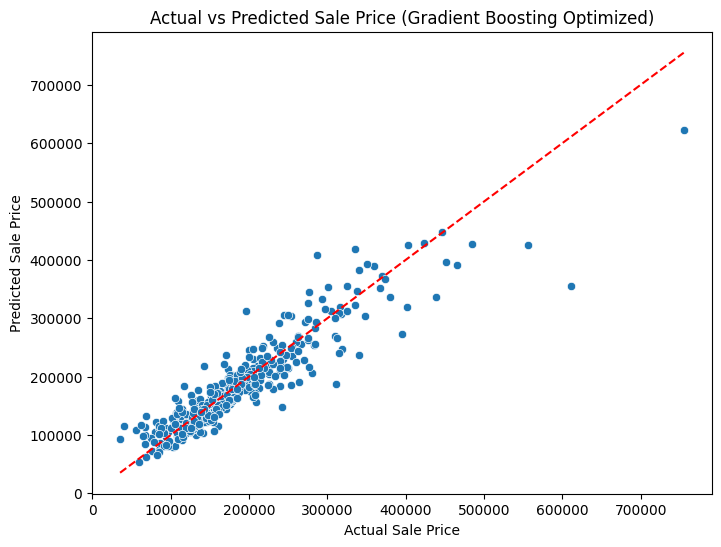

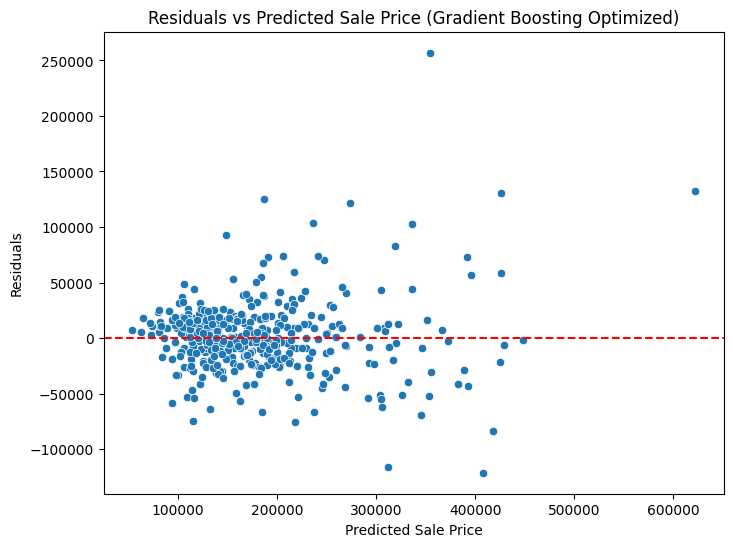

In [23]:
# Plot predicted vs actual values after optimization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=y_pred_original)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], color='red', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price (Gradient Boosting Optimized)")
plt.show()

# Scatter plot of residuals vs predicted values
residuals_optimized = y_test_original - y_pred_original
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_original, y=residuals_optimized)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sale Price (Gradient Boosting Optimized)")
plt.show()